# k-Nearest Neighbors Optimization

Train multiple KNN Classification models using using different values of hyperparameter K and compare the accuracy of each model on "cell2cell" -- a telecom company churn prediction data set.


## Import Packages

In [ ]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1. Build the DataFrame and Define the ML Problem

####  Load a Data Set and Save it as a Pandas DataFrame

We will work with a version of the "cell2cell" data set called "cell2celltrain." This data set has already been prepared with some of the data preparation techniques and is ready for modeling. Namely, the data contains proper data types, and has had outliers and missing values taken care of. In addition, all numerical columns have been scaled to the [0, 1] interval.

In [3]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)


#### Inspect the Data

In [4]:
df.shape

(51047, 58)

In [5]:
df.head()

,CustomerID,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,True,SEAPOR503,False,False,True,False,False,True,True,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,True,PITHOM412,True,False,False,False,False,True,True,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,False,MILMIL414,True,False,False,False,False,False,False,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,False,PITHOM412,False,False,True,False,False,True,True,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,True,OKCTUL918,False,False,False,False,False,True,True,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


#### Define the Label

We will predict whether a customer will remain with that telecommunications service or leave to another. This is an example of supervised learning and is a binary classification problem; it requires a label that contains a categorical value. In our dataset, our label will be the `Churn` column and the label will either contain the value `True` or `False`. Let's inspect the `Churn` column.

In [6]:
df['Churn']

0         True
1         True
2        False
3        False
4         True
         ...  
51042     True
51043    False
51044     True
51045    False
51046    False
Name: Churn, Length: 51047, dtype: bool

#### Identify Features

Our features can be all of the remaining columns in the dataset with one exception: to implement a k-nearest neighbors model, we must use features that allow us to compute the distance. This means we can only features that are not of string-value. 

In [7]:
df.dtypes

CustomerID                     int64
Churn                           bool
ServiceArea                   object
ChildrenInHH                    bool
HandsetRefurbished              bool
HandsetWebCapable               bool
TruckOwner                      bool
RVOwner                         bool
HomeownershipKnown              bool
BuysViaMailOrder                bool
RespondsToMailOffers            bool
OptOutMailings                  bool
NonUSTravel                     bool
OwnsComputer                    bool
HasCreditCard                   bool
NewCellphoneUser                bool
NotNewCellphoneUser             bool
OwnsMotorcycle                  bool
MadeCallToRetentionTeam         bool
CreditRating                  object
PrizmCode                     object
Occupation                    object
Married                       object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
O

The code cell below finds all columns of type `object`. 

In [8]:
to_exclude = list(df.select_dtypes(include=['object']).columns)
print(to_exclude)

['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation', 'Married']


The code cell below removes these columns.

In [9]:
df.drop(columns = to_exclude, axis = 1, inplace=True)

In [10]:
df.shape

(51047, 53)

In [11]:
df.columns

Index(['CustomerID', 'Churn', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
    

## Step 2: Create Labeled Examples from the Data Set for the Model Training Phase

Let's obtain columns from our data set to create labeled examples. 
The code cell below carries out the following steps:

* Gets the `Churn` column from DataFrame `df` and assigns it to the variable `y`. This is our label.
* Gets all other columns from DataFrame `df` and assigns them to the variable `X`. These are our features. 


In [12]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))



Number of examples: 51047

Number of Features:52
['CustomerID', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCre

## Step 3. Create Training and Test Data Sets

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

#### Get the Dimensions of the Training and Test Data Sets

In [14]:
X_train.shape

(34201, 52)

In [15]:
X_test.shape

(16846, 52)

####  Glance at the Training Data

In [16]:
X_train.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
10351,3081630,True,False,True,True,True,True,True,True,False,...,-0.616775,1.826064,0.210998,-0.883541,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.368174
33816,3269538,False,False,True,True,False,True,True,True,False,...,-0.616775,-0.167636,1.116204,0.202910,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.368174
36668,3292822,False,False,True,False,False,False,False,False,False,...,-0.616775,0.104233,-1.418373,-0.883541,-0.180167,-0.1283,-0.169283,-1.378025,-0.140707,-0.368174
12787,3100870,True,False,True,False,False,True,True,True,False,...,0.487071,-0.782294,1.025683,1.289361,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.864858
2635,3020642,False,False,True,False,False,True,False,False,False,...,-0.616775,3.019920,0.120477,-0.883541,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.368174


## Step 4: Train and Evaluate the Model: 
### Fit a KNN Classification Model and Evaluate the Model's Accuracy

In [17]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    model = KNeighborsClassifier(k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

## Step 5: Train and Evaluate Different KNN Models Using Different Values of Hyperparameter K

For a fixed data set and a chosen distance function, varying the value of the parameter `k` may have a substantial effect on the performance of the model. The optimal value of `k` depends on the data. <br>
    
Running the code below will train three KNN classifiers using the `train_test_knn()` function just implemented, and using three values of `k`: $10$, $100$, and $1000$. <br>It will print the accuracy score of each model and save the scores to list `acc1`. This may take a few seconds.


In [18]:
k_values = [10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))
    

k=10, accuracy score: 0.6938739166567731
k=100, accuracy score: 0.710198266650837
k=1000, accuracy score: 0.710198266650837


Next we will train three more KNN classifiers for the same values of `k`, but this time using only a subset of the training data -- just the first 1500 examples.

In [19]:
k_values = [10, 100, 1000]

acc2 = [] 

for k in k_values:
    score = train_test_knn(X_train[:1500], X_test, y_train[:1500], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))

    

k=10, accuracy score: 0.6811706042977561
k=100, accuracy score: 0.710198266650837
k=1000, accuracy score: 0.710198266650837


Let's visualize the results:

<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_26373/671483925.py:7: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Accuracy of the kNN predictions, for k$\in{10,100,1000}$')


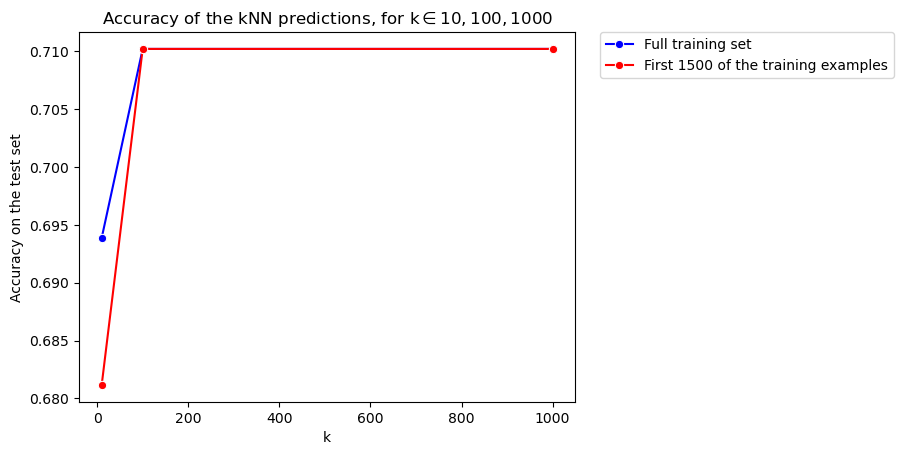

In [20]:
# Visualizing accuracy:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=acc1, color='b', marker='o', label = 'Full training set')
p2 = sns.lineplot(x=k_values, y=acc2, color='r', marker='o', label = 'First 1500 of the training examples')

plt.title('Accuracy of the kNN predictions, for k$\in{10,100,1000}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

Let's work with more than three values of `k`. 

The code bellow trains 40 KNN classifiers with different values of `k` (1-40). 

In [21]:
acc1_40 = [] 
print("Accuracy scores for full training data:")
for k in range(1,41):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1_40.append(float(score))
    


Accuracy scores for full training data:
k=1, accuracy score: 0.5901104119672326
k=2, accuracy score: 0.6712572717559064
k=3, accuracy score: 0.6251335628635878
k=4, accuracy score: 0.678736792116823
k=5, accuracy score: 0.6484031817642171
k=6, accuracy score: 0.6815861332066959
k=7, accuracy score: 0.663006054849816
k=8, accuracy score: 0.688590763385967
k=9, accuracy score: 0.6750563932090704
k=10, accuracy score: 0.6938739166567731
k=11, accuracy score: 0.682892081206221
k=12, accuracy score: 0.6967232577466461
k=13, accuracy score: 0.6860382286596225
k=14, accuracy score: 0.6980292057461712
k=15, accuracy score: 0.6896592662946693
k=16, accuracy score: 0.7004630179271043
k=17, accuracy score: 0.6949424195654755
k=18, accuracy score: 0.702600023744509
k=19, accuracy score: 0.6968419802920575
k=20, accuracy score: 0.7047963908346195
k=21, accuracy score: 0.7004036566543986
k=22, accuracy score: 0.7053306422889707
k=23, accuracy score: 0.7037278879259171
k=24, accuracy score: 0.7066365

The cell below accomplishes the same thing above, but using a subset of the data - the first 50 examples in the training set.

In [22]:
acc2_40 = []
print("\nAccuracy scores for 50 examples in training data:")
for k in range(1,41):
    score = train_test_knn(X_train[:50], X_test, y_train[:50], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2_40.append(float(score))
    




Accuracy scores for 50 examples in training data:
k=1, accuracy score: 0.5109818354505521
k=2, accuracy score: 0.592128695239226
k=3, accuracy score: 0.49050219636709014
k=4, accuracy score: 0.633444141042384
k=5, accuracy score: 0.5798409117891488
k=6, accuracy score: 0.6441291701294076
k=7, accuracy score: 0.5872610708773596
k=8, accuracy score: 0.6189599905021964
k=9, accuracy score: 0.5968775970556809
k=10, accuracy score: 0.6323756381336816
k=11, accuracy score: 0.5879734061498278
k=12, accuracy score: 0.6226403894099489
k=13, accuracy score: 0.6139736435949187
k=14, accuracy score: 0.6527365546717322
k=15, accuracy score: 0.61409236614033
k=16, accuracy score: 0.624718033954648
k=17, accuracy score: 0.6099964383236377
k=18, accuracy score: 0.6322569155882702
k=19, accuracy score: 0.6241837825002968
k=20, accuracy score: 0.6581977917606553
k=21, accuracy score: 0.6486406268550398
k=22, accuracy score: 0.6651430606672207
k=23, accuracy score: 0.6609877715778226
k=24, accuracy scor

Let's visualize the resulting accuracy values, as before:

<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_26373/573145490.py:8: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Accuracy of the kNN predictions, for $k\in(1, 40), k\in\mathbb{N}$')


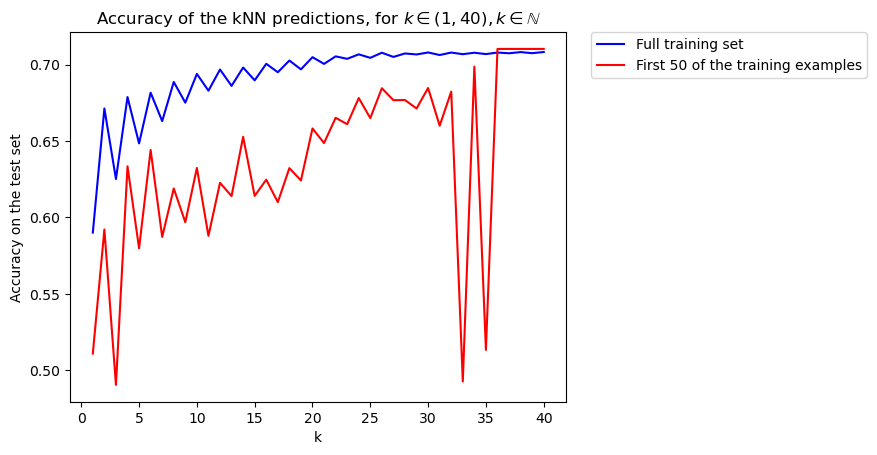

In [23]:
x = [i for i in range(1,41)]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = plt.plot(x, acc1_40, 'b-', label = 'Full training set')
p2 = plt.plot(x, acc2_40, 'r-', label = 'First 50 of the training examples') 

plt.title('Accuracy of the kNN predictions, for $k\in(1, 40), k\in\mathbb{N}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

## The Importance of Scaling

Note that Euclidean distance is *not* scale invariant. Features with higher norms will in general dominate the neighborhood. Hence, if the features with the highest norms are also *not* strongly predictive of the target variable, these features will harm the performance of the model. It is often best to rescale the features before running KNN. The dataset for this exercise already has this step done.


